In [2]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import soupsieve as sv

#### initialize empty lists

In [3]:
sites_list = []
namelist = []
induct_year = []
clean_induct_year = []

#### create sites_list dynamically

In [4]:
firstpage = "https://countrymusichalloffame.org/hall-of-fame/members/"
url_base = "https://countrymusichalloffame.org/hall-of-fame/members/page/" #no numbers here plz
startpage = 2
lastpage = 17 # make sure to go one more for python reasons!

sites_list.append(firstpage)

for i in range(startpage, lastpage):
    sites_list.append(url_base + str(i))

#### loop through list

In [5]:
for site in sites_list:
    response = requests.get(site)
    soup = BeautifulSoup(response.content, 'lxml')
    # loop to get names
    for names in soup.find_all('h3'):
        namelist.append(names.get_text())
    # loop to get induction years
    my_regex = re.compile(r"Inducted")
    for year in soup.find_all(text = my_regex):
        induct_year.append(year)

In [6]:
#cleaning induct_year output
for el in induct_year:
    clean_induct_year.append(el[-22:-18])

In [ ]:
### another way to get text from h3 tags
artist_list = [artist.text for artist in artist_names]

### convert lists to df

In [7]:
country_df = pd.DataFrame()
country_df['names'] = namelist
country_df['Induction Year'] = clean_induct_year
country_df[-20:]

,names,Induction Year
120,Hank Thompson,1989
121,Mel Tillis,2007
122,Floyd Tillman,1984
123,Merle Travis,1977
124,Randy Travis,2016
125,Ernest Tubb,1965
126,Grant Turner,1981
127,Conway Twitty,1999
128,Porter Wagoner,2002
129,Cindy Walker,1997


### fixing datatypes of columns

In [8]:
data_types_dict = {'names': str, 'Induction Year': 'int64'}
country_df = country_df.astype(data_types_dict)
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   names           140 non-null    object
 1   Induction Year  140 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


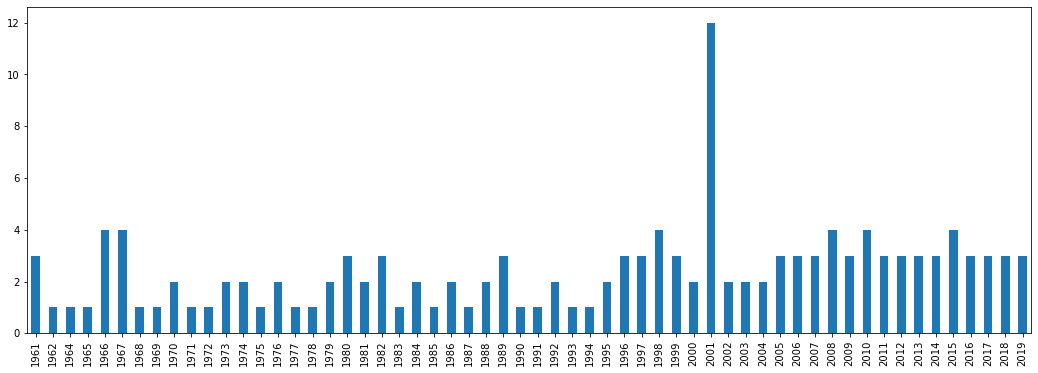

In [19]:
# country_df.value_counts("Induction Year") 
# country_df.sort_values("Induction Year")
# plt.bar(country_df["Induction Year"], country_df["Induction Year"].value_counts())

country_df['Induction Year'].value_counts().sort_index().plot(kind='bar', figsize=(18, 6));


In [11]:
country_df['namelen'] = country_df.apply(lambda x: len(x.names), axis=1)
country_df[0:50]

,names,Induction Year,namelen
0,Roy Acuff,1962,9
1,Alabama,2005,7
2,Bill Anderson,2001,13
3,Eddy Arnold,1966,11
4,Chet Atkins,1973,11
5,Gene Autry,1969,10
6,DeFord Bailey,2005,13
7,Bobby Bare,2013,10
8,Johnny Bond,1999,11
9,Bobby Braddock,2011,14


In [17]:
sorted_df = country_df.sort_values("Induction Year")
sorted_df


,names,Induction Year,namelen
98,Jimmie Rodgers,1961,14
101,Fred Rose,1961,9
135,Hank Williams,1961,13
0,Roy Acuff,1962,9
95,Tex Ritter,1964,10
...,...,...,...
108,Ricky Skaggs,2018,12
48,Johnny Gimble,2018,13
114,Ray Stevens,2019,11
15,Brooks & Dunn,2019,13


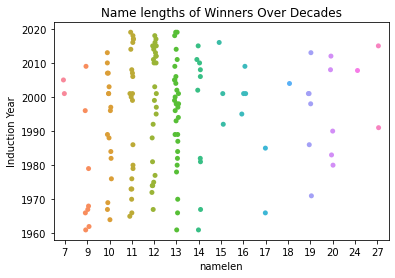

In [13]:
sns.stripplot(y = sorted_df["Induction Year"], x = sorted_df['namelen'])
plt.title("Name lengths of Winners Over Decades")
plt.show()

### Bonus Zone

In [92]:
#list for all p tags with info we want
biolinks = []

In [89]:
#CHEATING!! functions I wrote before with soup sieve
def get_attr(sv_target, targetlist, soup, desired_attr="href"):
    key_tags1 = sv.select(sv_target, soup)
    for link in key_tags1:
        targetlist.append(link.get(desired_attr))

def get_text(sv_target, targetlist, soup):
    key_tags2 = sv.select(sv_target, soup)
    for tag2 in key_tags2:
        targetlist.append(tag2.text)

In [93]:
for site in sites_list:
    response = requests.get(site)
    soup = BeautifulSoup(response.content, 'lxml')
    smallsoup = soup.find('div', {'class': 'vertical-cards-container'})
    #loop to get bio urls
    get_attr("div.fbyf-btn-wrapper.inline-text > a", biolinks, smallsoup)

In [95]:
len(biolinks)

140

### getting info on each bio page

In [97]:
lifeinfo = []

In [98]:
for site in biolinks:
    response = requests.get(site)
    soup = BeautifulSoup(response.content, 'lxml')
    targetsoup = soup.find('div', {'class': 'hero-left'})
    get_text("div p:last-child", lifeinfo, targetsoup)

In [119]:
lifeinfo[3]

'Birth: May 15, 1918 - Death: May 8, 2008  Birthplace: Henderson, Tennessee '

### pulling out specfic infos we need

In [173]:
birthlist = []
deathlist = []
birthplacelist = []

In [174]:
for line in lifeinfo:
    try:
        birthdate = re.search(r'Birth:\s\w+\s\d+,\s\d{4}', line)
        birthlist.append(birthdate.group())
    except:
        birthlist.append("")
    try:
        deathdate = re.search(r'Death:\s\w+\s\d+,\s\d{4}', line)
        deathlist.append(deathdate.group())
    except:
        deathlist.append("")
    try:
        birthplace = re.search(r'Birthplace:\s\w+,\s\D+', line)
        birthplacelist.append(birthplace.group())
    except:
        birthplacelist.append("")
        

### cleaning up the lists a bit

In [175]:
cleanbirth = []
cleandeath = []
cleanbirthplace = []

In [156]:
birthlist[0]

'Birth: September 15, 1903'

In [158]:
birthlist[0][7:]

'September 15, 1903'

In [176]:
for line in birthlist:
    cleanline = line[7:]
    cleanbirth.append(cleanline)

In [164]:
cleanbirth

['September 15, 1903',
 '',
 'November 1, 1937',
 'May 15, 1918',
 'June 20, 1924',
 'September 29, 1907',
 'December 14, 1899',
 'April 7, 1935',
 'June 1, 1915',
 'August 5, 1940',
 'January 2, 1926',
 'January 30, 1940',
 'October 21, 1915',
 'August 22, 1910',
 'February 7, 1962',
 '',
 'April 1, 1934',
 '',
 '',
 'April 22, 1936',
 'December 19, 1908',
 '',
 'February 26, 1932',
 'April 15, 1933',
 'April 5, 1931',
 'September 8, 1932',
 'August 2, 1935',
 'November 10, 1908',
 'October 27, 1933',
 'April 6, 1883',
 'October 28, 1936',
 'September 11, 1899',
 'August 10, 1928',
 '',
 '',
 'December 19, 1920',
 'March 10, 1933',
 '',
 '',
 'July 26, 1922',
 'June 17, 1910',
 'February 13, 1919',
 'July 26, 1931',
 'April 15, 1900',
 'March 31, 1928',
 'August 22, 1914',
 'April 3, 1928',
 'April 12, 1957',
 'May 30, 1926',
 'April 6, 1937',
 'May 25, 1936',
 'April 2, 1947',
 'November 9, 1895',
 '',
 'November 5, 1914',
 'September 8, 1927',
 'December 3, 1925',
 'October 17, 1958

In [165]:
deathlist

['Death: November 23, 1992',
 '',
 '',
 'Death: May 8, 2008',
 'Death: June 30, 2001',
 'Death: October 2, 1998',
 'Death: July 2, 1982',
 '',
 'Death: June 12, 1978',
 '',
 '',
 '',
 'Death: January 7, 1998',
 'Death: September 12, 1958',
 '',
 '',
 'Death: June 11, 2015',
 '',
 '',
 'Death: August 8, 2017',
 'Death: March 17, 2003',
 '',
 'Death: September 12, 2003',
 'Death: November 15, 2018',
 'Death: August 8, 2013',
 'Death: March 5, 1963',
 'Death: July 15, 2010',
 'Death: April 1, 1970',
 'Death: December 31, 1997',
 'Death: September 14, 1948',
 'Death: July 6, 2020',
 'Death: November 5, 2000',
 'Death: June 13, 2010',
 '',
 '',
 'Death: January 2, 2015',
 '',
 '',
 '',
 'Death: July 9, 2013',
 'Death: September 19, 1968',
 'Death: October 17, 1991',
 'Death: February 20, 2019',
 'Death: May 4, 1952',
 'Death: July 19, 1975',
 'Death: December 4, 1989',
 'Death: November 17, 2003',
 '',
 'Death: May 9, 2015',
 'Death: April 6, 2016',
 'Death: August 20, 2021',
 '',
 'Death: 

In [177]:
for line in deathlist:
    cleanline = line[7:]
    cleandeath.append(cleanline)

In [167]:
cleandeath

['November 23, 1992',
 '',
 '',
 'May 8, 2008',
 'June 30, 2001',
 'October 2, 1998',
 'July 2, 1982',
 '',
 'June 12, 1978',
 '',
 '',
 '',
 'January 7, 1998',
 'September 12, 1958',
 '',
 '',
 'June 11, 2015',
 '',
 '',
 'August 8, 2017',
 'March 17, 2003',
 '',
 'September 12, 2003',
 'November 15, 2018',
 'August 8, 2013',
 'March 5, 1963',
 'July 15, 2010',
 'April 1, 1970',
 'December 31, 1997',
 'September 14, 1948',
 'July 6, 2020',
 'November 5, 2000',
 'June 13, 2010',
 '',
 '',
 'January 2, 2015',
 '',
 '',
 '',
 'July 9, 2013',
 'September 19, 1968',
 'October 17, 1991',
 'February 20, 2019',
 'May 4, 1952',
 'July 19, 1975',
 'December 4, 1989',
 'November 17, 2003',
 '',
 'May 9, 2015',
 'April 6, 2016',
 'August 20, 2021',
 '',
 'May 8, 1968',
 '',
 'September 23, 2003',
 'March 3, 2002',
 'March 17, 2011',
 '',
 'February 22, 2016',
 'February 13, 2002',
 'April 26, 2013',
 'February 19, 1998',
 '',
 'March 7, 2000',
 '',
 'December 20, 1982',
 '',
 'September 7, 1972',

In [168]:
birthplacelist

['Birthplace: Maynardville, Tennessee',
 '',
 'Birthplace: Columbia, South',
 'Birthplace: Henderson, Tennessee',
 'Birthplace: Luttrell, Tennessee',
 'Birthplace: Tioga, Texas',
 '',
 '',
 'Birthplace: Enville, Oklahoma',
 'Birthplace: Lakeland, Florida',
 'Birthplace: Nashville, Tennessee',
 'Birthplace: Nashville, TN',
 'Birthplace: Westmoreland, Tennessee',
 'Birthplace: Smithville, Mississippi',
 'Birthplace: Tulsa, Oklahoma',
 '',
 'Birthplace: Sparkman, Arkansas',
 '',
 '',
 'Birthplace: Delight, Arkansas',
 'Birthplace: Wakefield, Kentucky',
 '',
 'Birthplace: Kingsland, Arkansas',
 'Birthplace: Meherrin, Virginia',
 'Birthplace: Whitehaven, Tennessee',
 'Birthplace: Winchester, Virginia',
 'Birthplace: Isola, Mississippi',
 'Birthplace: Chicago, Illinois',
 'Birthplace: Shreveport, Louisiana',
 'Birthplace: Jefferson, Texas',
 'Birthplace: Wilmington, North',
 '',
 'Birthplace: Olton, Texas',
 '',
 '',
 'Birthplace: Bolt, West',
 'Birthplace: McEwen, Tennessee',
 '',
 '',
 'Bi

In [169]:
birthplacelist[0][12:]

'Maynardville, Tennessee'

In [178]:
for line in birthplacelist:
    cleanline = line[12:]
    cleanbirthplace.append(cleanline)

In [171]:
cleanbirthplace

['Maynardville, Tennessee',
 '',
 'Columbia, South',
 'Henderson, Tennessee',
 'Luttrell, Tennessee',
 'Tioga, Texas',
 '',
 '',
 'Enville, Oklahoma',
 'Lakeland, Florida',
 'Nashville, Tennessee',
 'Nashville, TN',
 'Westmoreland, Tennessee',
 'Smithville, Mississippi',
 'Tulsa, Oklahoma',
 '',
 'Sparkman, Arkansas',
 '',
 '',
 'Delight, Arkansas',
 'Wakefield, Kentucky',
 '',
 'Kingsland, Arkansas',
 'Meherrin, Virginia',
 'Whitehaven, Tennessee',
 'Winchester, Virginia',
 'Isola, Mississippi',
 'Chicago, Illinois',
 'Shreveport, Louisiana',
 'Jefferson, Texas',
 'Wilmington, North',
 '',
 'Olton, Texas',
 '',
 '',
 'Bolt, West',
 'McEwen, Tennessee',
 '',
 '',
 'Lundale, West',
 '',
 'Bristol, Tennessee',
 '',
 '',
 'Corsicana, Texas',
 '',
 'Shelby, North',
 'Norman, Oklahoma',
 'Tyler, Texas',
 'Bakersfield, California',
 '',
 'Birmingham, Alabama',
 'Attica, Indiana',
 '',
 '',
 'Detroit, Michigan',
 'Cantwell, Missouri',
 'Newnan, Georgia',
 'Hackleburg, Alabama',
 'Littlefield,

### add clean lists to country_df

In [183]:
country_df = country_df.drop("Birth", axis = 1)

In [185]:
country_df["Birth Date"] = cleanbirth
country_df["Death Date"] = cleandeath
country_df["Birthplace"] = cleanbirthplace

,names,Induction Year,namelen,Birth Date,Death Date,Birthplace
0,Roy Acuff,1962,9,"September 15, 1903","November 23, 1992","Maynardville, Tennessee"
1,Alabama,2005,7,,,
2,Bill Anderson,2001,13,"November 1, 1937",,"Columbia, South Carolina"
3,Eddy Arnold,1966,11,"May 15, 1918","May 8, 2008","Henderson, Tennessee"
4,Chet Atkins,1973,11,"June 20, 1924","June 30, 2001","Luttrell, Tennessee"
...,...,...,...,...,...,...
125,Ernest Tubb,1965,11,"February 9, 1914","September 6, 1984",
126,Grant Turner,1981,12,"May 17, 1912","October 19, 1991","Baird, Texas"
127,Conway Twitty,1999,13,"September 1, 1933","June 5, 1993",
128,Porter Wagoner,2002,14,"August 12, 1927","October 28, 2007",


# final result

In [186]:
country_df

,names,Induction Year,namelen,Birth Date,Death Date,Birthplace
0,Roy Acuff,1962,9,"September 15, 1903","November 23, 1992","Maynardville, Tennessee"
1,Alabama,2005,7,,,
2,Bill Anderson,2001,13,"November 1, 1937",,"Columbia, South Carolina"
3,Eddy Arnold,1966,11,"May 15, 1918","May 8, 2008","Henderson, Tennessee"
4,Chet Atkins,1973,11,"June 20, 1924","June 30, 2001","Luttrell, Tennessee"
...,...,...,...,...,...,...
135,Hank Williams,1961,13,"September 17, 1923","January 1, 1953",
136,Bob Wills,1968,9,"March 6, 1905","May 13, 1975","Kosse, Texas"
137,Mac Wiseman,2014,11,"May 23, 1925","February 24, 2019","Crimora, Virginia"
138,Tammy Wynette,1998,13,"May 5, 1942","April 6, 1998",


### cool ideas for this data:
- visualize how old people were when they were inducted (avg. age, median age, max age, min age, etc.)
- see how many people were inducted before vs. after their death (would need to convert columns to datetime for comparison)